In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [3]:
pd.options.display.max_columns = 30

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Australian Dataset/weatherAUS.csv")

In [5]:
df.shape

(145460, 23)

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
col = df.columns
col

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,141232,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,12-11-2013,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,10838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,NaN,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,NaN,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Target Variable

In [11]:
df['RainTomorrow']

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

In [12]:
df['RainTomorrow'].isnull().sum()

3267

In [13]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [14]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

As we can see, Target variable data is highly imbalanced, we need to balance the data before we train the model, that we will see later

Now dropping the rows for which Target Variable is Null or NaN

In [15]:
df = df.dropna(subset = ["RainTomorrow"])
df.shape

(142193, 23)

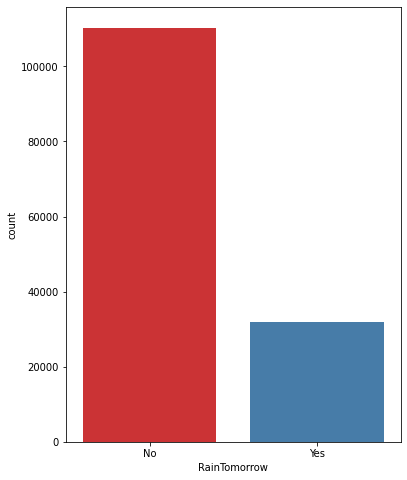

In [16]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

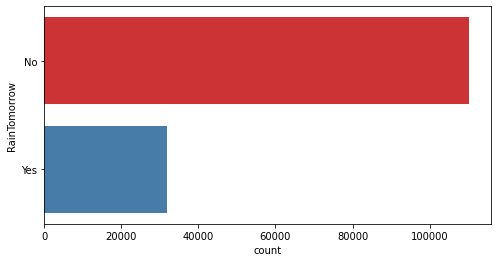

In [17]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

In [18]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [19]:
categorical = [var for var in df.columns if df[var].dtype=='object']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,W,W,WNW,No,No
1,02-12-2008,Albury,WNW,NNW,WSW,No,No
2,03-12-2008,Albury,WSW,W,WSW,No,No
3,04-12-2008,Albury,NE,SE,E,No,No
4,05-12-2008,Albury,W,ENE,NW,No,No


In [21]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [22]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [23]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [26]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64

In [27]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    12
1    12
2    12
3    12
4    12
Name: Day, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [29]:
df.drop('Date', axis=1, inplace = True)

In [30]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12


In [31]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [32]:
df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [33]:
print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [34]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [35]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [36]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,2017,6,20
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23


In [37]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [38]:
# pd.get_dummies(df.Location, drop_first=True).head()

In [39]:
# pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

In [40]:
# pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

In [41]:
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [42]:
df = create_dummies(df)

Location encoded
WindGustDir encoded
cannot convert float NaN to integer
WindDir9am encoded
cannot convert float NaN to integer
WindDir3pm encoded
cannot convert float NaN to integer
RainToday encoded
cannot convert float NaN to integer
RainTomorrow encoded


In [43]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,1,12
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,2,12
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,3,12
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,4,12
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,5,12


In [44]:
numerical = [var for var in df.columns if df[var].dtype!='object']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 21 numerical variables

The numerical variables are : ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'Year', 'Month', 'Day']


In [45]:
df[numerical].head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,2008,1,12
1,2,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,2008,2,12
2,2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,2008,3,12
3,2,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,2008,4,12
4,2,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,2008,5,12


Text(0, 0.5, 'RainTomorrow')

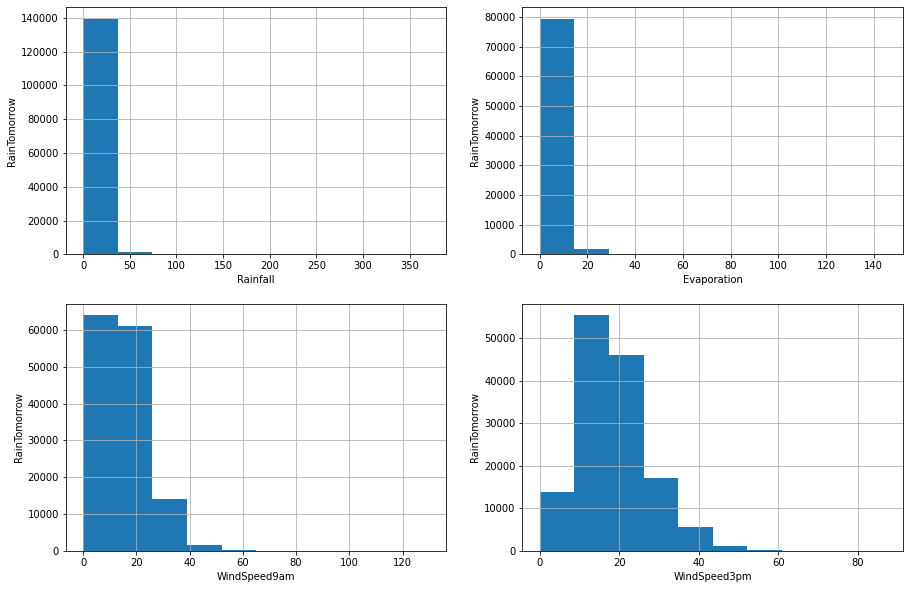

In [46]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'WindSpeed3pm')

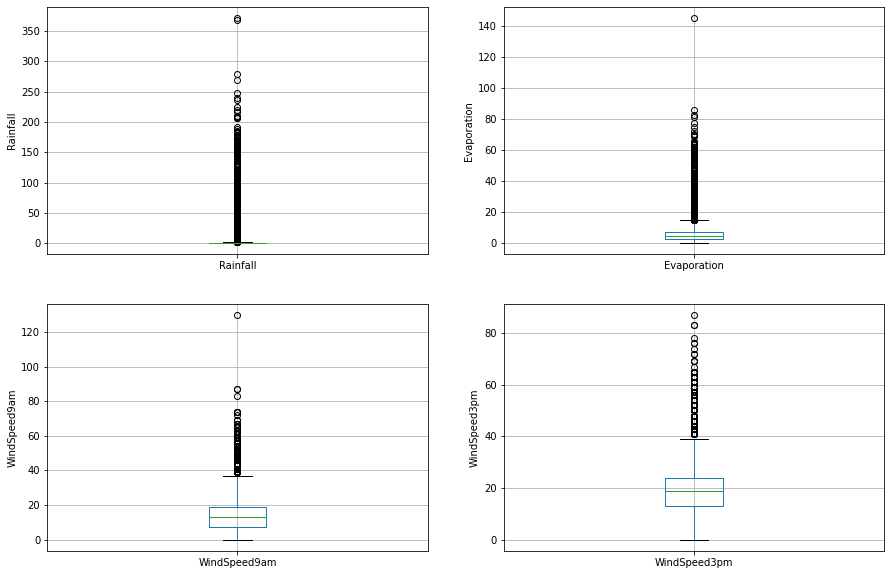

In [47]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

# ANOMALY DETECTION

In [48]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [49]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [50]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [51]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [52]:
correlation = df.corr()

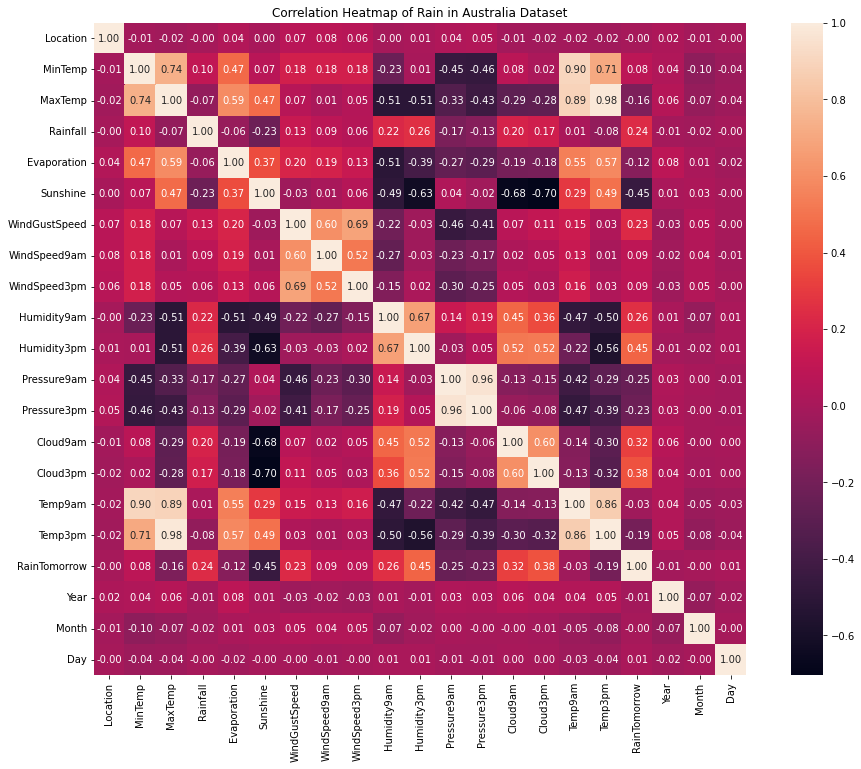

In [53]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

In [54]:
# num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

In [55]:
# sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()

In [56]:
def impute_mean(impupte_mean_list):
    for value in impute_mean_list:
        df[value] = df[value].fillna(df[value].mean())

In [57]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [58]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,1,12
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,2,12
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,3,12
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,4,12
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,5,12


In [59]:
impute_mean_list = ['Location',	'MinTemp', 'MaxTemp',	'Rainfall',	'Evaporation',	'Sunshine',	'WindGustDir',	'WindGustSpeed',	'WindDir9am',	'WindDir3pm',	'WindSpeed9am',	'WindSpeed3pm',	'Humidity9am',	'Humidity3pm',	'Pressure9am',	'Pressure3pm',	'Cloud9am',	'Cloud3pm',	'Temp9am',	'Temp3pm',	'RainToday',	'RainTomorrow',	'Year',	'Month',	'Day']
impute_mean(impute_mean_list)


In [60]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [61]:
# array = df.values

# X = array[:,0:24]
# Y = array[:,24]
# # feature extraction
# test = SelectKBest(score_func=f_classif, k=4)
# fit = test.fit(X, Y)
# # summarize scores
# set_printoptions(precision=10)
# print(fit.scores_)
# features = fit.transform(X)
# # summarize selected features
# print(features[0:25,:])

In [62]:
# from pandas import read_csv
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# array = df.values
# X = array[:,0:24]
# Y = array[:,24]
# # feature extraction
# model = LogisticRegression(solver='lbfgs')
# rfe = RFE(model)
# fit = rfe.fit(X, Y)
# print("Num Features: %d" % fit.n_features_)
# print("Selected Features: %s" % fit.support_)
# print("Feature Ranking: %s" % fit.ranking_)

In [63]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.469824,7.624853,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0,2008,1,12
1,2,7.4,25.1,0.0,5.469824,7.624853,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0,2008,2,12
2,2,12.9,25.7,0.0,5.469824,7.624853,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0,2008,3,12
3,2,9.2,28.0,0.0,5.469824,7.624853,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0,2008,4,12
4,2,17.5,32.3,1.0,5.469824,7.624853,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,2008,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,5.469824,7.624853,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0.0,0,2017,6,20
145455,41,2.8,23.4,0.0,5.469824,7.624853,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0.0,0,2017,6,21
145456,41,3.6,25.3,0.0,5.469824,7.624853,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0.0,0,2017,6,22
145457,41,5.4,26.9,0.0,5.469824,7.624853,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0.0,0,2017,6,23


In [64]:
newdf = df

# MODELS Running on ORIGINAL DATASET

In [65]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [67]:
X_train.shape, X_test.shape

((106644, 24), (35549, 24))

In [68]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, labels = [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION

In [70]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from datetime import datetime
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)

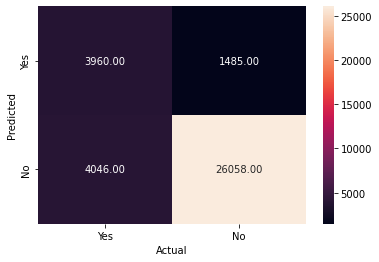

Total Accuracy :  0.84
Logistic F1 Score:  0.833
Logistic Precision:  0.727
Logistic Recall:  0.495


In [71]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_logreg )

lrf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, y_pred), 3)
lr_recall = round(recall_score(y_test, y_pred), 3)

print("Logistic F1 Score: ", lrf1)
print("Logistic Precision: ", lr_precision)
print("Logistic Recall: ", lr_recall)

KNN Classifier

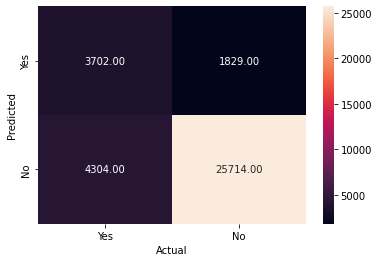

Total Accuracy :  0.827
KNN F1 Score:  0.815
KNN Precision:  0.669
KNN Recall:  0.462


In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

knnf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)

# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_knn )
print("KNN F1 Score: ", knnf1)
print("KNN Precision: ", knn_precision)
print("KNN Recall: ", knn_recall)

GAUSIAN NB

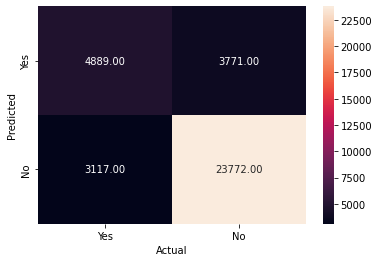

Total Accuracy :  0.81
GAUSIAN NB F1 Score:  0.809
GAUSIAN NB  Precision:  0.565
GAUSIAN NB  Recall:  0.611


In [73]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_nb )

gnbf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
gnb_precision = round(precision_score(y_test, y_pred), 3)
gnb_recall = round(recall_score(y_test, y_pred), 3)

print("GAUSIAN NB F1 Score: ", gnbf1)
print("GAUSIAN NB  Precision: ", gnb_precision)
print("GAUSIAN NB  Recall: ", gnb_recall)

SVM

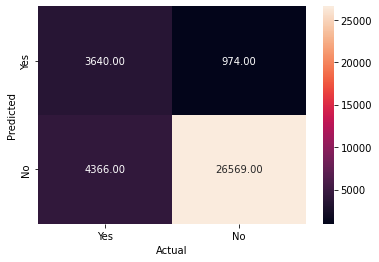

Total Accuracy :  0.85
SVM F1 Score:  0.834
SVM Precision:  0.789
SVM Recall:  0.455


In [74]:
from sklearn import svm

svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_svm )

svmf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
svm_precision = round(precision_score(y_test, y_pred), 3)
svm_recall = round(recall_score(y_test, y_pred), 3)

print("SVM F1 Score: ", svmf1)
print("SVM Precision: ", svm_precision)
print("SVM Recall: ", svm_recall)

RANDOM FOREST

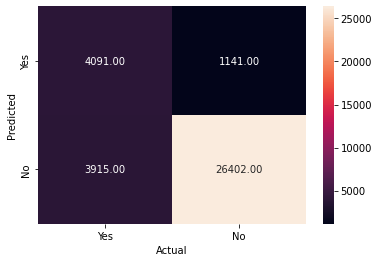

Total Accuracy :  0.858
RANDOM FOREST F1 Score:  0.846
RANDOM FOREST Precision:  0.782
RANDOM FOREST Recall:  0.511


In [75]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_rf )

rff1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)

print("RANDOM FOREST F1 Score: ", rff1)
print("RANDOM FOREST Precision: ", rf_precision)
print("RANDOM FOREST Recall: ", rf_recall)

DECISION TREE

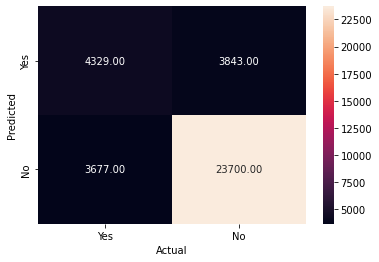

Total Accuracy :  0.79
DECISION TREE F1 Score:  0.789
DECISION TREE Precision:  0.53
DECISION TREE Recall:  0.541


In [76]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

# Model prediction on train data
y_pred = clf.predict(X_test)

# Prediction on test set
#y_pred = clf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_dt = round(metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_dt)

dtf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dt_precision = round(precision_score(y_test, y_pred), 3)
dt_recall = round(recall_score(y_test, y_pred), 3)

print("DECISION TREE F1 Score: ", dtf1)
print("DECISION TREE Precision: ", dt_precision)
print("DECISION TREE Recall: ", dt_recall)

XGBOOST

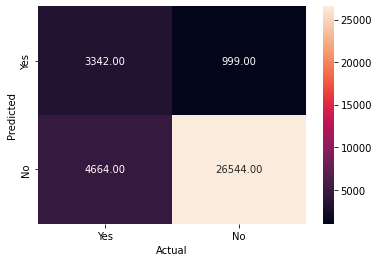

Total Accuracy :  0.841
XGBOOST F1 Score:  0.8220245599574437
XGBOOST Precision:  0.77
XGBOOST Recall:  0.417


In [77]:
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# Train the model using the training sets
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_xgb )

xgf1 = f1_score(y_test, y_pred, average='weighted')
xg_precision = round(precision_score(y_test, y_pred), 3)
xg_recall = round(recall_score(y_test, y_pred), 3)

print("XGBOOST F1 Score: ", xgf1)
print("XGBOOST Precision: ", xg_precision)
print("XGBOOST Recall: ", xg_recall)

# FINAL RESULT OF MODELS RUNNING ON ORIGINAL DATASET

In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb], 
    'F1Score': [lrf1, gnbf1, dtf1, rff1, svmf1, knnf1, xgf1], 
    'Precision': [lr_precision, gnb_precision, dt_precision, rf_precision, svm_precision, knn_precision, xg_precision], 
    'Recall': [lr_recall, gnb_recall, dt_recall, rf_recall, svm_recall, knn_recall, xg_recall]})
models.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
3,Random Forest,0.858,0.846000,0.782,0.511
4,Support Vector Machines,0.850,0.834000,0.789,0.455
6,XGBoost,0.841,0.822025,0.770,0.417
0,Logistic Regression,0.840,0.833000,0.727,0.495
5,K - Nearest Neighbors,0.827,0.815000,0.669,0.462
1,Naive Bayes,0.810,0.809000,0.565,0.611
2,Decision Tree,0.790,0.789000,0.530,0.541


# UNDERSAMPLING DATA

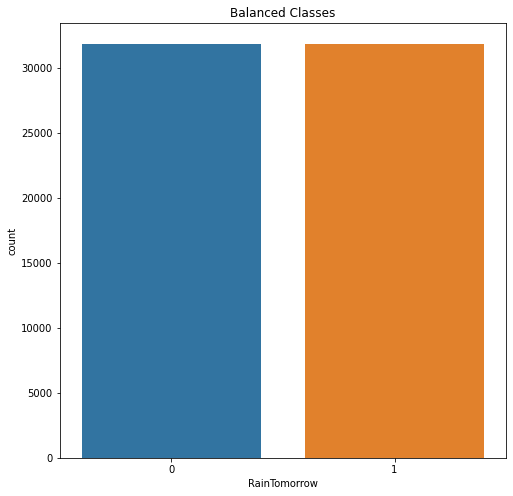

In [79]:
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
yes_df = shuffled_df.loc[shuffled_df['RainTomorrow'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
no_df = shuffled_df.loc[shuffled_df['RainTomorrow'] == 0].sample(n=31877,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([yes_df, no_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('RainTomorrow', data = normalized_df)
plt.title('Balanced Classes')
plt.show()

In [80]:
normalized_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
139960,13,23.1,33.8,2.0,6.400000,9.000000,6.000000,31.000000,0.000000,7.000000,11.000000,17.000000,73.0,54.0,1010.500000,1006.400000,7.000000,7.000000,27.2,32.2,1.0,1,2010,10,28
135479,17,11.4,18.3,2.0,5.469824,7.624853,11.000000,26.000000,9.000000,11.000000,7.000000,13.000000,88.0,87.0,1017.653758,1015.258204,8.000000,7.000000,12.7,16.9,1.0,1,2015,12,11
30651,37,14.8,19.7,27.2,1.800000,0.200000,7.712072,39.984292,7.303351,7.755417,14.001988,18.637576,53.0,62.0,1023.900000,1022.000000,7.000000,7.000000,19.2,18.7,1.0,1,2009,5,21
35914,38,19.4,30.7,0.0,6.800000,7.700000,4.000000,46.000000,6.000000,4.000000,13.000000,28.000000,59.0,45.0,1020.200000,1015.800000,2.000000,2.000000,24.4,29.2,0.0,1,2015,10,20
86433,7,17.2,25.2,0.2,3.000000,4.400000,12.000000,22.000000,4.000000,13.000000,2.000000,9.000000,89.0,71.0,1018.900000,1016.000000,7.000000,7.000000,20.1,22.3,0.0,1,2015,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91272,14,19.7,26.3,0.0,5.469824,7.624853,5.000000,37.000000,7.000000,5.000000,15.000000,28.000000,65.0,62.0,1015.800000,1012.900000,4.437189,4.503167,22.8,24.6,0.0,0,2011,10,29
124951,36,8.6,31.4,0.0,5.469824,7.624853,5.000000,39.000000,3.000000,6.000000,19.000000,6.000000,40.0,14.0,1017.653758,1015.258204,4.437189,4.503167,22.8,30.3,0.0,0,2012,4,3
132878,15,16.3,21.1,0.4,5.200000,12.000000,13.000000,93.000000,13.000000,15.000000,28.000000,26.000000,43.0,27.0,999.200000,1007.200000,6.000000,2.000000,17.0,20.0,0.0,0,2017,1,24
86057,7,15.6,24.0,0.0,6.000000,1.800000,0.000000,28.000000,15.000000,0.000000,4.000000,9.000000,64.0,64.0,1024.600000,1021.900000,7.000000,8.000000,19.1,20.7,0.0,0,2014,10,5


In [81]:
X = normalized_df.drop(['RainTomorrow'], axis=1)
y = normalized_df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train Shape:  (47815, 24)
X_test Shape:  (15939, 24)


LOGISTIC REGRESSION ON UNDERSAMPLING DATA

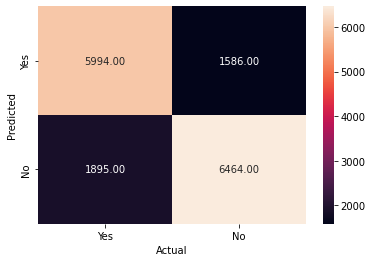

Total Accuracy :  0.78
Logistic F1 Score:  0.781
Logistic Precision:  0.791
Logistic Recall:  0.76


In [82]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
lrf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, y_pred), 3)
lr_recall = round(recall_score(y_test, y_pred), 3)

acc_logreg = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_logreg )
print("Logistic F1 Score: ", lrf1)
print("Logistic Precision: ", lr_precision)
print("Logistic Recall: ", lr_recall)

KNN ON UNDERSAMPLING DATA

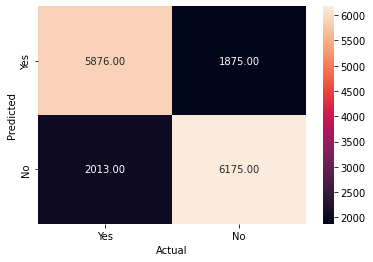

Total Accuracy :  0.756
KNN F1 Score:  0.756
KNN Precision:  0.758
KNN Recall:  0.745


In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

knnf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)

# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_knn )
print("KNN F1 Score: ", knnf1)
print("KNN Precision: ", knn_precision)
print("KNN Recall: ", knn_recall)

GAUSIAN NB ON UNDERSAMPLING DATA

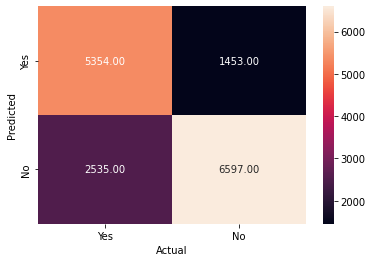

Total Accuracy :  0.75
GAUSIAN NB F1 Score:  0.748
GAUSIAN NB  Precision:  0.787
GAUSIAN NB  Recall:  0.679


In [84]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_nb )

gnbf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
gnb_precision = round(precision_score(y_test, y_pred), 3)
gnb_recall = round(recall_score(y_test, y_pred), 3)

print("GAUSIAN NB F1 Score: ", gnbf1)
print("GAUSIAN NB  Precision: ", gnb_precision)
print("GAUSIAN NB  Recall: ", gnb_recall)

SVM ON UNDERSAMPLING DATA

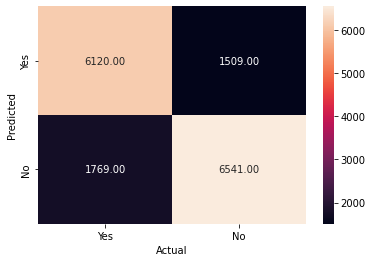

Total Accuracy :  0.79
SVM F1 Score:  0.794
SVM Precision:  0.802
SVM Recall:  0.776


In [85]:
from sklearn import svm

svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_svm )

svmf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
svm_precision = round(precision_score(y_test, y_pred), 3)
svm_recall = round(recall_score(y_test, y_pred), 3)

print("SVM F1 Score: ", svmf1)
print("SVM Precision: ", svm_precision)
print("SVM Recall: ", svm_recall)

RANDOM FOREST ON UNDERSAMPLING DATA

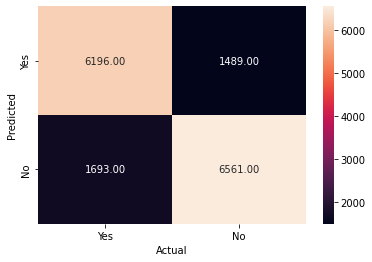

Total Accuracy :  0.8
RANDOM FOREST F1 Score:  0.8
RANDOM FOREST Precision:  0.806
RANDOM FOREST Recall:  0.785


In [86]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_rf )

rff1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)

print("RANDOM FOREST F1 Score: ", rff1)
print("RANDOM FOREST Precision: ", rf_precision)
print("RANDOM FOREST Recall: ", rf_recall)

DECISION TREE ON UNDERSAMPLING DATA

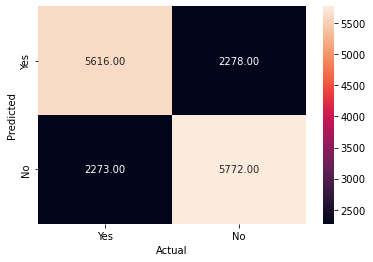

Total Accuracy :  0.71
DECISION TREE F1 Score:  0.714
DECISION TREE Precision:  0.711
DECISION TREE Recall:  0.712


In [87]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

# Model prediction on train data
y_pred = clf.predict(X_test)

# Prediction on test set
#y_pred = clf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_dt = round(metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_dt)

dtf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dt_precision = round(precision_score(y_test, y_pred), 3)
dt_recall = round(recall_score(y_test, y_pred), 3)

print("DECISION TREE F1 Score: ", dtf1)
print("DECISION TREE Precision: ", dt_precision)
print("DECISION TREE Recall: ", dt_recall)

XGBOOST ON UNDERSAMPLING DATA

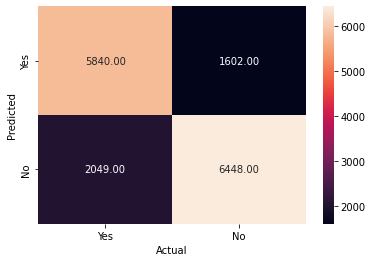

Total Accuracy :  0.771
XGBOOST F1 Score:  0.7706938071029213
XGBOOST Precision:  0.785
XGBOOST Recall:  0.74


In [88]:
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# Train the model using the training sets
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_xgb )

xgf1 = f1_score(y_test, y_pred, average='weighted')
xg_precision = round(precision_score(y_test, y_pred), 3)
xg_recall = round(recall_score(y_test, y_pred), 3)

print("XGBOOST F1 Score: ", xgf1)
print("XGBOOST Precision: ", xg_precision)
print("XGBOOST Recall: ", xg_recall)

# AFTER PERFORMING UNDERSAMPLING, FINAL RESULT OF ALL MODELS

In [89]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb], 
    'F1Score': [lrf1, gnbf1, dtf1, rff1, svmf1, knnf1, xgf1], 
    'Precision': [lr_precision, gnb_precision, dt_precision, rf_precision, svm_precision, knn_precision, xg_precision], 
    'Recall': [lr_recall, gnb_recall, dt_recall, rf_recall, svm_recall, knn_recall, xg_recall]})
models.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
3,Random Forest,0.800,0.800000,0.806,0.785
4,Support Vector Machines,0.790,0.794000,0.802,0.776
0,Logistic Regression,0.780,0.781000,0.791,0.760
6,XGBoost,0.771,0.770694,0.785,0.740
5,K - Nearest Neighbors,0.756,0.756000,0.758,0.745
1,Naive Bayes,0.750,0.748000,0.787,0.679
2,Decision Tree,0.710,0.714000,0.711,0.712


# OVERSAMPLING DATA

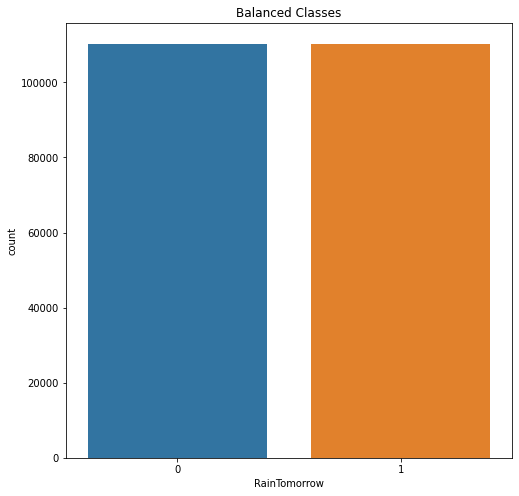

In [90]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(df.drop('RainTomorrow', axis=1), df['RainTomorrow'])
oversampled_df = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns

plt.figure(figsize=(8, 8))
sns.countplot(oversampled_df['RainTomorrow'])
plt.title('Balanced Classes')
plt.show()

In [91]:
oversampled_df

,RainTomorrow,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,0,2,13.400000,22.900000,0.600000,5.469824,7.624853,13.000000,44.000000,13.000000,14.000000,20.000000,24.000000,71.000000,22.000000,1007.700000,1007.100000,8.000000,4.503167,16.900000,21.800000,0.000000,2008,1,12
1,0,2,7.400000,25.100000,0.000000,5.469824,7.624853,14.000000,44.000000,6.000000,15.000000,4.000000,22.000000,44.000000,25.000000,1010.600000,1007.800000,4.437189,4.503167,17.200000,24.300000,0.000000,2008,2,12
2,0,2,12.900000,25.700000,0.000000,5.469824,7.624853,15.000000,46.000000,13.000000,15.000000,19.000000,26.000000,38.000000,30.000000,1007.600000,1008.700000,4.437189,2.000000,21.000000,23.200000,0.000000,2008,3,12
3,0,2,9.200000,28.000000,0.000000,5.469824,7.624853,4.000000,24.000000,9.000000,0.000000,11.000000,9.000000,45.000000,16.000000,1017.600000,1012.800000,4.437189,4.503167,18.100000,26.500000,0.000000,2008,4,12
4,0,2,17.500000,32.300000,1.000000,5.469824,7.624853,13.000000,41.000000,1.000000,7.000000,7.000000,20.000000,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,0.000000,2008,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220627,1,5,8.112898,16.038694,49.990286,3.119515,7.624853,3.193560,67.000000,3.145170,3.193560,20.483900,35.387120,99.000000,75.145170,998.430635,992.135492,8.000000,5.145170,15.654812,15.929016,1.000000,2010,3,9
220628,1,34,10.079041,14.587634,4.397252,4.722553,5.026185,13.140894,57.731951,7.000000,13.013740,24.563577,29.436423,82.845366,67.281789,998.508244,997.091406,5.779809,4.503167,11.462203,13.235398,1.000000,2009,11,11
220629,1,37,8.073580,16.439233,0.000000,2.026420,2.476222,7.772520,39.958286,13.026420,11.887856,23.894318,21.911163,77.762216,47.118433,1012.426818,1010.430998,6.000000,6.934033,9.255483,14.689890,0.000000,2009,6,16
220630,1,41,14.650753,33.675377,0.000000,6.210210,7.624853,8.000000,41.465662,3.616416,6.000000,9.767169,15.767169,63.301507,30.931324,1014.949247,1010.708208,3.885906,5.077329,21.012395,31.064489,0.000000,2012,1,22


In [92]:
X = oversampled_df.drop(['RainTomorrow'], axis=1)
y = oversampled_df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train Shape:  (165474, 24)
X_test Shape:  (55158, 24)


LOGISTIC REGRESSION ON OVERSAMPLING DATA

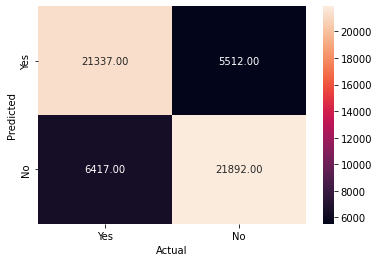

Total Accuracy :  0.78
Logistic F1 Score:  0.784
Logistic Precision:  0.795
Logistic Recall:  0.769


In [93]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
lrf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, y_pred), 3)
lr_recall = round(recall_score(y_test, y_pred), 3)

acc_logreg = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_logreg )
print("Logistic F1 Score: ", lrf1)
print("Logistic Precision: ", lr_precision)
print("Logistic Recall: ", lr_recall)

KNN ON OVERSAMPLING DATA

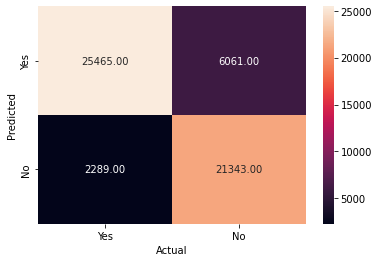

Total Accuracy :  0.849
KNN F1 Score:  0.848
KNN Precision:  0.808
KNN Recall:  0.918


In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

knnf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)

# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_knn )
print("KNN F1 Score: ", knnf1)
print("KNN Precision: ", knn_precision)
print("KNN Recall: ", knn_recall)

SVM ON OVERSAMPLING DATA

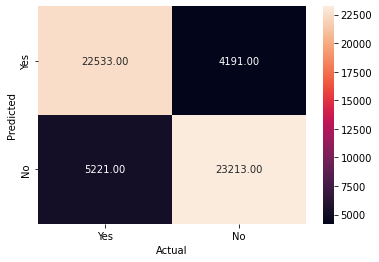

Total Accuracy :  0.83
SVM F1 Score:  0.829
SVM Precision:  0.843
SVM Recall:  0.812


In [95]:
from sklearn import svm

svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_svm )

svmf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
svm_precision = round(precision_score(y_test, y_pred), 3)
svm_recall = round(recall_score(y_test, y_pred), 3)

print("SVM F1 Score: ", svmf1)
print("SVM Precision: ", svm_precision)
print("SVM Recall: ", svm_recall)

GAUSIAN NB ON OVERSAMPLING DATA

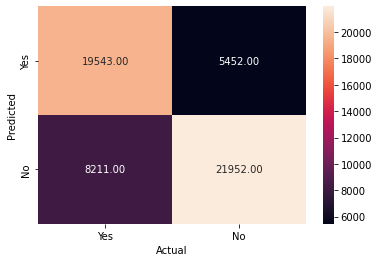

Total Accuracy :  0.75
GAUSIAN NB F1 Score:  0.752
GAUSIAN NB Precision:  0.782
GAUSIAN NB Recall:  0.704


In [96]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_nb )

gnbf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
gnb_precision = round(precision_score(y_test, y_pred), 3)
gnb_recall = round(recall_score(y_test, y_pred), 3)

print("GAUSIAN NB F1 Score: ", gnbf1)
print("GAUSIAN NB Precision: ", gnb_precision)
print("GAUSIAN NB Recall: ", gnb_recall)

RANDOM FOREST ON OVERSAMPLING DATA

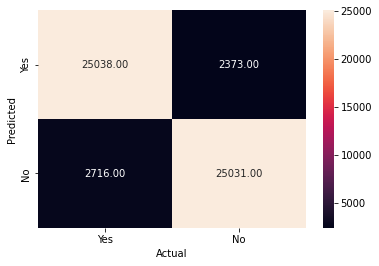

Total Accuracy :  0.908
RANDOM FOREST F1 Score:  0.908
RANDOM FOREST Precision:  0.913
RANDOM FOREST Recall:  0.902


In [97]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_rf )

rff1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)

print("RANDOM FOREST F1 Score: ", rff1)
print("RANDOM FOREST Precision: ", rf_precision)
print("RANDOM FOREST Recall: ", rf_recall)

DECISION TREE ON OVERSAMPLING DATA

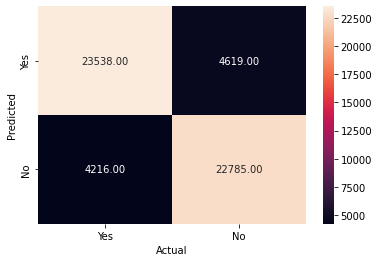

Total Accuracy :  0.84
DECISION TREE F1 Score:  0.84
DECISION TREE Precision:  0.836
DECISION TREE Recall:  0.848


In [98]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

# Model prediction on train data
y_pred = clf.predict(X_test)

# Prediction on test set
#y_pred = clf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_dt = round(metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_dt)

dtf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dt_precision = round(precision_score(y_test, y_pred), 3)
dt_recall = round(recall_score(y_test, y_pred), 3)

print("DECISION TREE F1 Score: ", dtf1)
print("DECISION TREE Precision: ", dt_precision)
print("DECISION TREE Recall: ", dt_recall)

XGBOOST ON OVERSAMPLING DATA

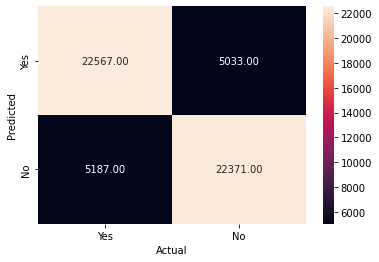

Total Accuracy :  0.815
XGBOOST F1 Score:  0.8147159323200487
XGBOOST Precision:  0.818
XGBOOST Recall:  0.813


In [99]:
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# Train the model using the training sets
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_xgb )

xgf1 = f1_score(y_test, y_pred, average='weighted')
xg_precision = round(precision_score(y_test, y_pred), 3)
xg_recall = round(recall_score(y_test, y_pred), 3)

print("XGBOOST F1 Score: ", xgf1)
print("XGBOOST Precision: ", xg_precision)
print("XGBOOST Recall: ", xg_recall)

# AFTER RUNNING OVERSAMPLING, FINAL RESULT OF ALL MODELS

In [100]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb], 
    'F1Score': [lrf1, gnbf1, dtf1, rff1, svmf1, knnf1, xgf1], 
    'Precision': [lr_precision, gnb_precision, dt_precision, rf_precision, svm_precision, knn_precision, xg_precision], 
    'Recall': [lr_recall, gnb_recall, dt_recall, rf_recall, svm_recall, knn_recall, xg_recall]})
models.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
3,Random Forest,0.908,0.908000,0.913,0.902
5,K - Nearest Neighbors,0.849,0.848000,0.808,0.918
2,Decision Tree,0.840,0.840000,0.836,0.848
4,Support Vector Machines,0.830,0.829000,0.843,0.812
6,XGBoost,0.815,0.814716,0.818,0.813
0,Logistic Regression,0.780,0.784000,0.795,0.769
1,Naive Bayes,0.750,0.752000,0.782,0.704


# UNI-VARIATE FEATURE SELECTION ON ORIGINAL DATA

In [101]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

cols = df.columns

scaler = MinMaxScaler()
df2 = scaler.fit_transform(df)

df3 = pd.DataFrame(df2, columns=[cols])

#data = pd.read_csv("D://Blogs//train.csv")
X = df3.drop(columns=["RainTomorrow"])
y = df3['RainTomorrow']    #target column i.e price range
#apply SelectKBest class to extract top 16 best features

bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalue],axis=1)
featureScores.columns = ['Specs','Score', 'pValue']  #naming the dataframe columns
# print(featureScores.nlargest(18,'Score', 'pValue'))  #print 16 best features
# print(featureScores)
print("Largest 16: ")
print(featureScores.nlargest(16,'Score'))  #print 16 best features

Largest 16: 
               Specs         Score         pValue
20      (RainToday,)  10525.135647   0.000000e+00
13    (Humidity3pm,)   2250.868368   0.000000e+00
17       (Cloud3pm,)   1415.977529  7.087482e-310
16       (Cloud9am,)   1190.567067  6.844558e-261
5        (Sunshine,)   1028.820450  9.768482e-226
3        (Rainfall,)    649.275220  3.211712e-143
12    (Humidity9am,)    481.974085  7.946742e-107
7   (WindGustSpeed,)    284.102581   9.585072e-64
19        (Temp3pm,)    172.226113   2.415346e-39
14    (Pressure9am,)    157.679498   3.636408e-36
15    (Pressure3pm,)    122.689686   1.630568e-28
2         (MaxTemp,)    122.687226   1.632590e-28
6     (WindGustDir,)     58.103957   2.486257e-14
11   (WindSpeed3pm,)     50.382904   1.264914e-12
10   (WindSpeed9am,)     50.148701   1.425255e-12
1         (MinTemp,)     46.377883   9.750995e-12


In [102]:
X = X[['RainToday', 'Humidity3pm', 'Cloud3pm', 'Cloud9am', 'Sunshine', 'Rainfall', 'Humidity9am', 'WindGustSpeed', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'MaxTemp', 'WindGustDir', 'WindSpeed3pm', 'WindSpeed9am', 'MinTemp']]
X

,RainToday,Humidity3pm,Cloud3pm,Cloud9am,Sunshine,Rainfall,Humidity9am,WindGustSpeed,Temp3pm,Pressure9am,Pressure3pm,MaxTemp,WindGustDir,WindSpeed3pm,WindSpeed9am,MinTemp
0,0.0,0.22,0.500352,0.888889,0.525852,0.001617,0.71,0.294574,0.522073,0.449587,0.4800,0.523629,0.866667,0.275862,0.153846,0.516509
1,0.0,0.25,0.500352,0.493021,0.525852,0.000000,0.44,0.294574,0.570058,0.497521,0.4912,0.565217,0.933333,0.252874,0.030769,0.375000
2,0.0,0.30,0.222222,0.493021,0.525852,0.000000,0.38,0.310078,0.548944,0.447934,0.5056,0.576560,1.000000,0.298851,0.146154,0.504717
3,0.0,0.16,0.500352,0.493021,0.525852,0.000000,0.45,0.139535,0.612284,0.613223,0.5712,0.620038,0.266667,0.103448,0.084615,0.417453
4,0.0,0.33,0.888889,0.777778,0.525852,0.002695,0.82,0.271318,0.673704,0.500826,0.4624,0.701323,0.866667,0.229885,0.053846,0.613208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.0,0.27,0.500352,0.493021,0.525852,0.000000,0.59,0.193798,0.504798,0.730579,0.7056,0.502836,0.000000,0.149425,0.115385,0.283019
142189,0.0,0.24,0.500352,0.493021,0.525852,0.000000,0.51,0.193798,0.533589,0.728926,0.6912,0.533081,0.000000,0.126437,0.100000,0.266509
142190,0.0,0.21,0.500352,0.493021,0.525852,0.000000,0.56,0.124031,0.573896,0.710744,0.6720,0.568998,0.400000,0.103448,0.100000,0.285377
142191,0.0,0.24,0.500352,0.493021,0.525852,0.000000,0.53,0.240310,0.604607,0.669421,0.6352,0.599244,0.200000,0.103448,0.069231,0.327830


In [103]:
y

,RainTomorrow
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
142188,0.0
142189,0.0
142190,0.0
142191,0.0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train Shape:  (106644, 16)
X_test Shape:  (35549, 16)


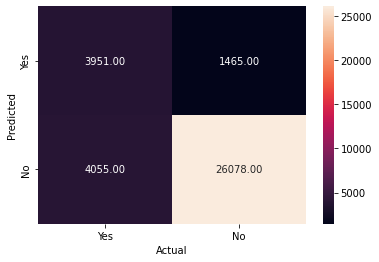

Total Accuracy :  0.84
Logistic F1 Score:  0.833
Logistic Precision:  0.73
Logistic Recall:  0.494


In [105]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
lrf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, y_pred), 3)
lr_recall = round(recall_score(y_test, y_pred), 3)

acc_logreg = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_logreg )
print("Logistic F1 Score: ", lrf1)
print("Logistic Precision: ", lr_precision)
print("Logistic Recall: ", lr_recall)

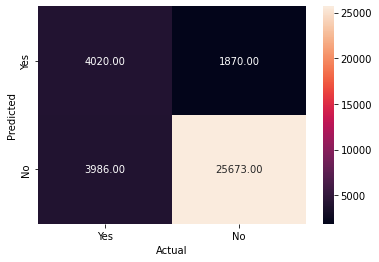

Total Accuracy :  0.835
KNN F1 Score:  0.826
KNN Precision:  0.683
KNN Recall:  0.502


In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

knnf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)

# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_knn )
print("KNN F1 Score: ", knnf1)
print("KNN Precision: ", knn_precision)
print("KNN Recall: ", knn_recall)

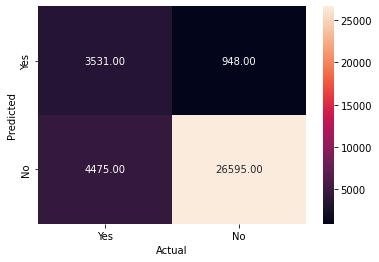

Total Accuracy :  0.85
SVM F1 Score:  0.83
SVM Precision:  0.788
SVM Recall:  0.441


In [107]:
from sklearn import svm

svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_svm )

svmf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
svm_precision = round(precision_score(y_test, y_pred), 3)
svm_recall = round(recall_score(y_test, y_pred), 3)

print("SVM F1 Score: ", svmf1)
print("SVM Precision: ", svm_precision)
print("SVM Recall: ", svm_recall)

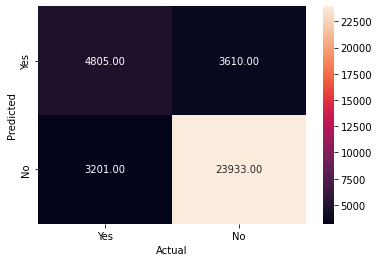

Total Accuracy :  0.81
GAUSIAN NB F1 Score:  0.81
GAUSIAN NB Precision:  0.571
GAUSIAN NB Recall:  0.6


In [108]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_nb )

gnbf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
gnb_precision = round(precision_score(y_test, y_pred), 3)
gnb_recall = round(recall_score(y_test, y_pred), 3)

print("GAUSIAN NB F1 Score: ", gnbf1)
print("GAUSIAN NB Precision: ", gnb_precision)
print("GAUSIAN NB Recall: ", gnb_recall)

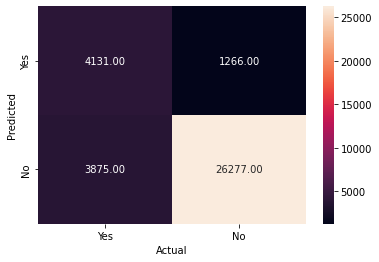

Total Accuracy :  0.855
RANDOM FOREST F1 Score:  0.845
RANDOM FOREST Precision:  0.765
RANDOM FOREST Recall:  0.516


In [109]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_rf )

rff1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)

print("RANDOM FOREST F1 Score: ", rff1)
print("RANDOM FOREST Precision: ", rf_precision)
print("RANDOM FOREST Recall: ", rf_recall)

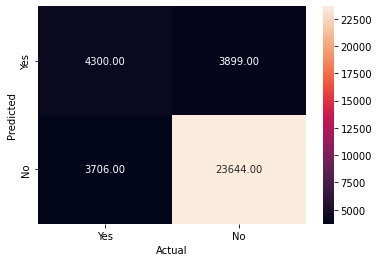

Total Accuracy :  0.79
DECISION TREE F1 Score:  0.787
DECISION TREE Precision:  0.524
DECISION TREE Recall:  0.537


In [110]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

# Model prediction on train data
y_pred = clf.predict(X_test)

# Prediction on test set
#y_pred = clf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_dt = round(metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_dt)

dtf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dt_precision = round(precision_score(y_test, y_pred), 3)
dt_recall = round(recall_score(y_test, y_pred), 3)

print("DECISION TREE F1 Score: ", dtf1)
print("DECISION TREE Precision: ", dt_precision)
print("DECISION TREE Recall: ", dt_recall)

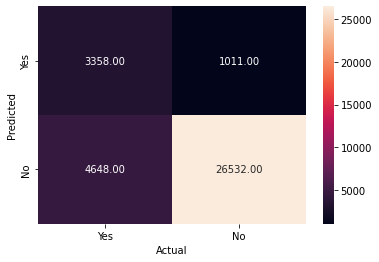

Total Accuracy :  0.841
XGBOOST F1 Score:  0.8223482364253643
XGBOOST Precision:  0.769
XGBOOST Recall:  0.419


In [111]:
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# Train the model using the training sets
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_xgb )

xgf1 = f1_score(y_test, y_pred, average='weighted')
xg_precision = round(precision_score(y_test, y_pred), 3)
xg_recall = round(recall_score(y_test, y_pred), 3)

print("XGBOOST F1 Score: ", xgf1)
print("XGBOOST Precision: ", xg_precision)
print("XGBOOST Recall: ", xg_recall)

# AFTER PERFORMING FEATURE EXTRACTION ON ORIGINAL DATA, FINAL RESULT OF ALL MODELS

In [112]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb], 
    'F1Score': [lrf1, gnbf1, dtf1, rff1, svmf1, knnf1, xgf1], 
    'Precision': [lr_precision, gnb_precision, dt_precision, rf_precision, svm_precision, knn_precision, xg_precision], 
    'Recall': [lr_recall, gnb_recall, dt_recall, rf_recall, svm_recall, knn_recall, xg_recall]})
models.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
3,Random Forest,0.855,0.845000,0.765,0.516
4,Support Vector Machines,0.850,0.830000,0.788,0.441
6,XGBoost,0.841,0.822348,0.769,0.419
0,Logistic Regression,0.840,0.833000,0.730,0.494
5,K - Nearest Neighbors,0.835,0.826000,0.683,0.502
1,Naive Bayes,0.810,0.810000,0.571,0.600
2,Decision Tree,0.790,0.787000,0.524,0.537


# MODEL RUNNING ON FEATURE ENGINEERED UNDERSAMPLING DATA

In [113]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

cols = df.columns

scaler = MinMaxScaler()
#UNDERSAMPLED DATA
df2 = scaler.fit_transform(normalized_df)

df3 = pd.DataFrame(df2, columns=[cols])

#data = pd.read_csv("D://Blogs//train.csv")
X = df3.drop(columns=["RainTomorrow"])
y = df3['RainTomorrow']    #target column i.e price range
#apply SelectKBest class to extract top 16 best features

bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalue],axis=1)
featureScores.columns = ['Specs','Score', 'pValue']  #naming the dataframe columns
# print(featureScores.nlargest(18,'Score', 'pValue'))  #print 16 best features
# print(featureScores)
print("Largest 16: ")
print(featureScores.nlargest(16,'Score'))  #print 16 best features

Largest 16: 
               Specs        Score         pValue
20      (RainToday,)  4891.158675   0.000000e+00
13    (Humidity3pm,)  1298.956350  1.905555e-284
17       (Cloud3pm,)   939.514585  2.523640e-206
5        (Sunshine,)   727.627248  2.938607e-160
16       (Cloud9am,)   706.760675  1.012887e-155
12    (Humidity9am,)   307.215992   8.824921e-69
3        (Rainfall,)   273.067690   2.434071e-61
7   (WindGustSpeed,)   180.595712   3.592142e-41
19        (Temp3pm,)   114.911799   8.227677e-27
14    (Pressure9am,)   106.820117   4.874670e-25
2         (MaxTemp,)    83.492267   6.396570e-20
15    (Pressure3pm,)    82.994106   8.229840e-20
10   (WindSpeed9am,)    46.029397   1.164918e-11
6     (WindGustDir,)    34.911819   3.449803e-09
1         (MinTemp,)    32.684562   1.083947e-08
11   (WindSpeed3pm,)    30.809505   2.846403e-08


In [114]:
X = X[['RainToday', 'Humidity3pm', 'Cloud3pm', 'Sunshine', 'Cloud9am', 'Humidity9am', 'Rainfall', 'WindGustSpeed', 'Temp3pm', 'Pressure9am', 'MaxTemp', 'Pressure3pm', 'WindSpeed9am', 'WindGustDir', 'MinTemp', 'WindSpeed3pm']]
print(X)
print(y)

      RainToday Humidity3pm  Cloud3pm  Sunshine  Cloud9am Humidity9am  Rainfall WindGustSpeed   Temp3pm Pressure9am   MaxTemp Pressure3pm WindSpeed9am WindGustDir   MinTemp WindSpeed3pm
0           1.0        0.54  0.875000  0.629371  0.777778    0.727273  0.005391      0.187500  0.720077    0.500835  0.737354    0.474110     0.126437    0.400000  0.781407     0.195402
1           1.0        0.87  0.875000  0.533207  0.888889    0.878788  0.005391      0.148438  0.424710    0.620263  0.435798    0.617447     0.080460    0.733333  0.487437     0.149425
2           1.0        0.62  0.875000  0.013986  0.777778    0.525253  0.073315      0.257690  0.459459    0.724541  0.463035    0.726537     0.160942    0.514138  0.572864     0.214225
3           0.0        0.45  0.250000  0.538462  0.222222    0.585859  0.000000      0.304688  0.662162    0.662771  0.677043    0.626214     0.149425    0.266667  0.688442     0.321839
4           0.0        0.71  0.875000  0.307692  0.777778    0.888889 

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train Shape:  (47815, 16)
X_test Shape:  (15939, 16)


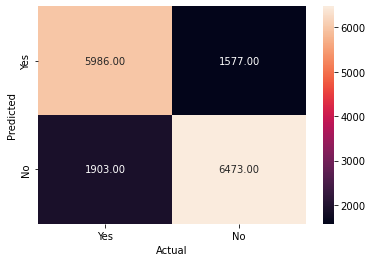

Total Accuracy :  0.78
Logistic F1 Score:  0.782
Logistic Precision:  0.791
Logistic Recall:  0.759


In [116]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
lrf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, y_pred), 3)
lr_recall = round(recall_score(y_test, y_pred), 3)

acc_logreg = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_logreg )
print("Logistic F1 Score: ", lrf1)
print("Logistic Precision: ", lr_precision)
print("Logistic Recall: ", lr_recall)

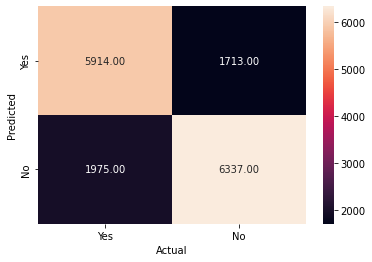

Total Accuracy :  0.769
KNN F1 Score:  0.769
KNN Precision:  0.775
KNN Recall:  0.75


In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

knnf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)

# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_knn )
print("KNN F1 Score: ", knnf1)
print("KNN Precision: ", knn_precision)
print("KNN Recall: ", knn_recall)

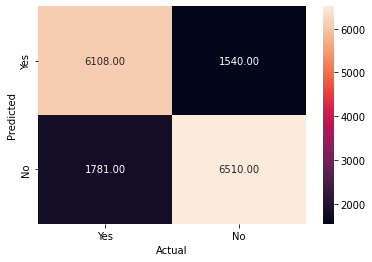

Total Accuracy :  0.79
SVM F1 Score:  0.792
SVM Precision:  0.799
SVM Recall:  0.774


In [118]:
from sklearn import svm

svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_svm )

svmf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
svm_precision = round(precision_score(y_test, y_pred), 3)
svm_recall = round(recall_score(y_test, y_pred), 3)

print("SVM F1 Score: ", svmf1)
print("SVM Precision: ", svm_precision)
print("SVM Recall: ", svm_recall)

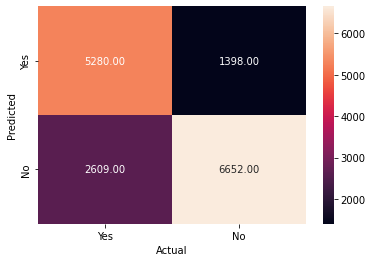

Total Accuracy :  0.75
GAUSIAN NB F1 Score:  0.747
GAUSIAN NB Precision:  0.791
GAUSIAN NB Recall:  0.669


In [119]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_nb )

gnbf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
gnb_precision = round(precision_score(y_test, y_pred), 3)
gnb_recall = round(recall_score(y_test, y_pred), 3)

print("GAUSIAN NB F1 Score: ", gnbf1)
print("GAUSIAN NB Precision: ", gnb_precision)
print("GAUSIAN NB Recall: ", gnb_recall)

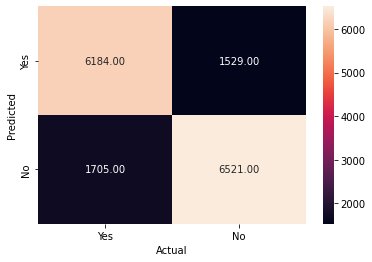

Total Accuracy :  0.797
RANDOM FOREST F1 Score:  0.797
RANDOM FOREST Precision:  0.802
RANDOM FOREST Recall:  0.784


In [120]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_rf )

rff1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)

print("RANDOM FOREST F1 Score: ", rff1)
print("RANDOM FOREST Precision: ", rf_precision)
print("RANDOM FOREST Recall: ", rf_recall)

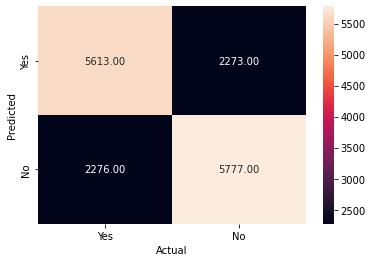

Total Accuracy :  0.71
DECISION TREE F1 Score:  0.715
DECISION TREE Precision:  0.712
DECISION TREE Recall:  0.711


In [121]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

# Model prediction on train data
y_pred = clf.predict(X_test)

# Prediction on test set
#y_pred = clf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_dt = round(metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_dt)

dtf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dt_precision = round(precision_score(y_test, y_pred), 3)
dt_recall = round(recall_score(y_test, y_pred), 3)

print("DECISION TREE F1 Score: ", dtf1)
print("DECISION TREE Precision: ", dt_precision)
print("DECISION TREE Recall: ", dt_recall)

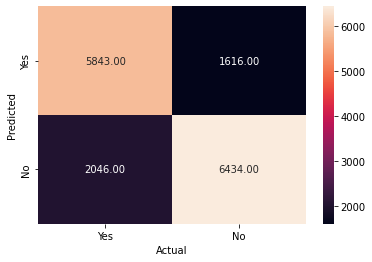

Total Accuracy :  0.77
XGBOOST F1 Score:  0.7700189364765393
XGBOOST Precision:  0.783
XGBOOST Recall:  0.741


In [122]:
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# Train the model using the training sets
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_xgb )

xgf1 = f1_score(y_test, y_pred, average='weighted')
xg_precision = round(precision_score(y_test, y_pred), 3)
xg_recall = round(recall_score(y_test, y_pred), 3)

print("XGBOOST F1 Score: ", xgf1)
print("XGBOOST Precision: ", xg_precision)
print("XGBOOST Recall: ", xg_recall)

# AFTER PERFORMING FEATURE EXTRACTION ON UNDERSAMPLED DATA, FINAL RESULT OF ALL MODELS

In [123]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb], 
    'F1Score': [lrf1, gnbf1, dtf1, rff1, svmf1, knnf1, xgf1], 
    'Precision': [lr_precision, gnb_precision, dt_precision, rf_precision, svm_precision, knn_precision, xg_precision], 
    'Recall': [lr_recall, gnb_recall, dt_recall, rf_recall, svm_recall, knn_recall, xg_recall]})
models.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
3,Random Forest,0.797,0.797000,0.802,0.784
4,Support Vector Machines,0.790,0.792000,0.799,0.774
0,Logistic Regression,0.780,0.782000,0.791,0.759
6,XGBoost,0.770,0.770019,0.783,0.741
5,K - Nearest Neighbors,0.769,0.769000,0.775,0.750
1,Naive Bayes,0.750,0.747000,0.791,0.669
2,Decision Tree,0.710,0.715000,0.712,0.711


# MODEL RUNNING ON FEATURE ENGINEERED OVERSAMPLING DATA

In [124]:
oversampled_df["RainTomorrow"].value_counts()

0    110316
1    110316
Name: RainTomorrow, dtype: int64

In [126]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

cols = oversampled_df.columns

scaler = MinMaxScaler()
df2 = scaler.fit_transform(oversampled_df)

df3 = pd.DataFrame(df2, columns=[cols])

#data = pd.read_csv("D://Blogs//train.csv")
X = df3.drop(columns=["RainTomorrow"])
y = df3['RainTomorrow']    #target column i.e price range
#apply SelectKBest class to extract top 16 best features

bestfeatures = SelectKBest(score_func=chi2, k=18)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalue],axis=1)
featureScores.columns = ['Specs','Score', 'pValue']  #naming the dataframe columns
# print(featureScores.nlargest(18,'Score', 'pValue'))  #print 16 best features
# print(featureScores)
print("Largest 16: ")
print(featureScores.nlargest(18,'Score'))  #print 16 best features

Largest 16: 
               Specs         Score         pValue
20      (RainToday,)  16834.872693   0.000000e+00
13    (Humidity3pm,)   4490.578575   0.000000e+00
17       (Cloud3pm,)   2844.900427   0.000000e+00
16       (Cloud9am,)   2402.454025   0.000000e+00
5        (Sunshine,)   2397.667590   0.000000e+00
12    (Humidity9am,)   1031.225916  2.930762e-226
3        (Rainfall,)    873.880223  4.677773e-192
7   (WindGustSpeed,)    576.870224  1.798348e-127
19        (Temp3pm,)    394.571259   8.369957e-88
14    (Pressure9am,)    346.828235   2.078956e-77
2         (MaxTemp,)    286.154711   3.423174e-64
15    (Pressure3pm,)    269.727994   1.300744e-60
6     (WindGustDir,)    137.777907   8.150062e-32
21           (Year,)    127.027401   1.832262e-29
11   (WindSpeed3pm,)    116.168573   4.365654e-27
10   (WindSpeed9am,)    107.667283   3.179075e-25
1         (MinTemp,)    102.657158   3.984692e-24
22          (Month,)     79.109331   5.876612e-19


In [127]:
X = X[['RainToday', 'Humidity3pm', 'Cloud3pm', 'Sunshine', 'Cloud9am', 'Humidity9am', 'Rainfall', 'WindGustSpeed', 'Temp3pm', 'Pressure9am', 'MaxTemp', 'Pressure3pm', 'WindSpeed9am', 'WindGustDir', 'MinTemp', 'WindSpeed3pm', 'Month', 'Year']]
print(X)
print(y)

       RainToday Humidity3pm  Cloud3pm  Sunshine  Cloud9am Humidity9am  Rainfall WindGustSpeed   Temp3pm Pressure9am   MaxTemp Pressure3pm WindSpeed9am WindGustDir   MinTemp WindSpeed3pm     Month Year
0       0.000000    0.220000  0.500352  0.525852  0.888889    0.710000  0.001617      0.294574  0.522073    0.449587  0.523629    0.480000     0.153846    0.866667  0.516509     0.275862  0.000000  0.1
1       0.000000    0.250000  0.500352  0.525852  0.493021    0.440000  0.000000      0.294574  0.570058    0.497521  0.565217    0.491200     0.030769    0.933333  0.375000     0.252874  0.090909  0.1
2       0.000000    0.300000  0.222222  0.525852  0.493021    0.380000  0.000000      0.310078  0.548944    0.447934  0.576560    0.505600     0.146154    1.000000  0.504717     0.298851  0.181818  0.1
3       0.000000    0.160000  0.500352  0.525852  0.493021    0.450000  0.000000      0.139535  0.612284    0.613223  0.620038    0.571200     0.084615    0.266667  0.417453     0.103448  0.27

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train Shape:  (165474, 18)
X_test Shape:  (55158, 18)


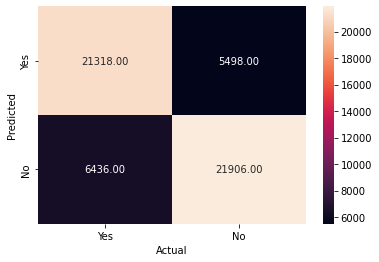

Total Accuracy :  0.78
Logistic F1 Score:  0.784
Logistic Precision:  0.795
Logistic Recall:  0.768


In [129]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
lrf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, y_pred), 3)
lr_recall = round(recall_score(y_test, y_pred), 3)

acc_logreg = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_logreg )
print("Logistic F1 Score: ", lrf1)
print("Logistic Precision: ", lr_precision)
print("Logistic Recall: ", lr_recall)

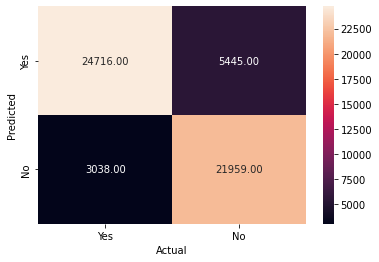

Total Accuracy :  0.846
KNN F1 Score:  0.846
KNN Precision:  0.819
KNN Recall:  0.891


In [130]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

knnf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)

# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_knn )
print("KNN F1 Score: ", knnf1)
print("KNN Precision: ", knn_precision)
print("KNN Recall: ", knn_recall)

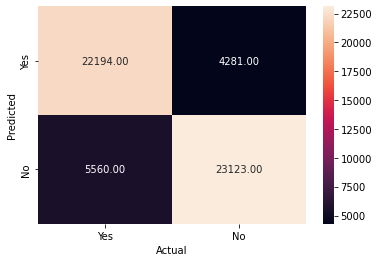

Total Accuracy :  0.82
SVM F1 Score:  0.822
SVM Precision:  0.838
SVM Recall:  0.8


In [131]:
from sklearn import svm

svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_svm )

svmf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
svm_precision = round(precision_score(y_test, y_pred), 3)
svm_recall = round(recall_score(y_test, y_pred), 3)

print("SVM F1 Score: ", svmf1)
print("SVM Precision: ", svm_precision)
print("SVM Recall: ", svm_recall)

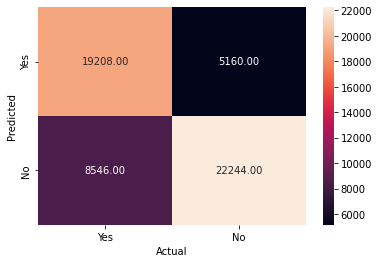

Total Accuracy :  0.75
GAUSIAN NB F1 Score:  0.751
GAUSIAN NB Precision:  0.788
GAUSIAN NB Recall:  0.692


In [132]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_nb )

gnbf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
gnb_precision = round(precision_score(y_test, y_pred), 3)
gnb_recall = round(recall_score(y_test, y_pred), 3)

print("GAUSIAN NB F1 Score: ", gnbf1)
print("GAUSIAN NB Precision: ", gnb_precision)
print("GAUSIAN NB Recall: ", gnb_recall)

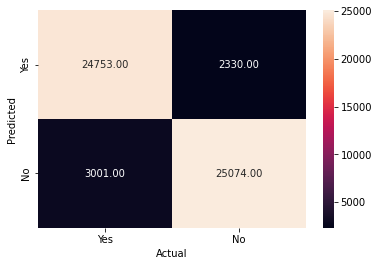

Total Accuracy :  0.903
RANDOM FOREST F1 Score:  0.903
RANDOM FOREST Precision:  0.914
RANDOM FOREST Recall:  0.892


In [133]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_rf )

rff1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)

print("RANDOM FOREST F1 Score: ", rff1)
print("RANDOM FOREST Precision: ", rf_precision)
print("RANDOM FOREST Recall: ", rf_recall)

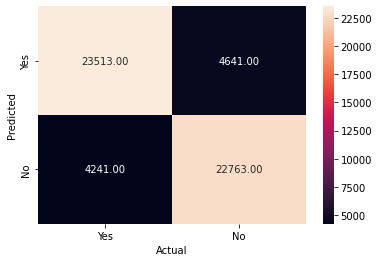

Total Accuracy :  0.84
DECISION TREE F1 Score:  0.839
DECISION TREE Precision:  0.835
DECISION TREE Recall:  0.847


In [134]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

# Model prediction on train data
y_pred = clf.predict(X_test)

# Prediction on test set
#y_pred = clf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_dt = round(metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_dt)

dtf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dt_precision = round(precision_score(y_test, y_pred), 3)
dt_recall = round(recall_score(y_test, y_pred), 3)

print("DECISION TREE F1 Score: ", dtf1)
print("DECISION TREE Precision: ", dt_precision)
print("DECISION TREE Recall: ", dt_recall)

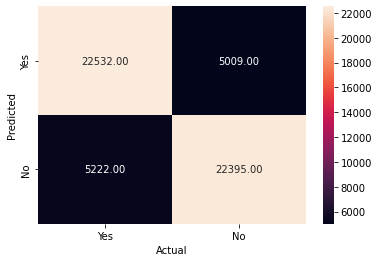

Total Accuracy :  0.815
XGBOOST F1 Score:  0.8145164460364375
XGBOOST Precision:  0.818
XGBOOST Recall:  0.812


In [135]:
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# Train the model using the training sets
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_xgb )

xgf1 = f1_score(y_test, y_pred, average='weighted')
xg_precision = round(precision_score(y_test, y_pred), 3)
xg_recall = round(recall_score(y_test, y_pred), 3)

print("XGBOOST F1 Score: ", xgf1)
print("XGBOOST Precision: ", xg_precision)
print("XGBOOST Recall: ", xg_recall)

# AFTER PERFORMING FEATURE EXTRACTION ON OVERSAMPLED DATA (18 FEATURES), FINAL RESULT OF ALL MODELS

In [136]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb], 
    'F1Score': [lrf1, gnbf1, dtf1, rff1, svmf1, knnf1, xgf1], 
    'Precision': [lr_precision, gnb_precision, dt_precision, rf_precision, svm_precision, knn_precision, xg_precision], 
    'Recall': [lr_recall, gnb_recall, dt_recall, rf_recall, svm_recall, knn_recall, xg_recall]})
models.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
3,Random Forest,0.903,0.903000,0.914,0.892
5,K - Nearest Neighbors,0.846,0.846000,0.819,0.891
2,Decision Tree,0.840,0.839000,0.835,0.847
4,Support Vector Machines,0.820,0.822000,0.838,0.800
6,XGBoost,0.815,0.814516,0.818,0.812
0,Logistic Regression,0.780,0.784000,0.795,0.768
1,Naive Bayes,0.750,0.751000,0.788,0.692


In [137]:
X = X[['RainToday', 'Humidity3pm', 'Cloud3pm', 'Sunshine', 'Cloud9am', 'Humidity9am', 'Rainfall', 'WindGustSpeed', 'Temp3pm', 'Pressure9am', 'MaxTemp', 'Pressure3pm', 'WindSpeed9am', 'WindGustDir', 'MinTemp', 'WindSpeed3pm']]
print(X)
print(y)

       RainToday Humidity3pm  Cloud3pm  Sunshine  Cloud9am Humidity9am  Rainfall WindGustSpeed   Temp3pm Pressure9am   MaxTemp Pressure3pm WindSpeed9am WindGustDir   MinTemp WindSpeed3pm
0       0.000000    0.220000  0.500352  0.525852  0.888889    0.710000  0.001617      0.294574  0.522073    0.449587  0.523629    0.480000     0.153846    0.866667  0.516509     0.275862
1       0.000000    0.250000  0.500352  0.525852  0.493021    0.440000  0.000000      0.294574  0.570058    0.497521  0.565217    0.491200     0.030769    0.933333  0.375000     0.252874
2       0.000000    0.300000  0.222222  0.525852  0.493021    0.380000  0.000000      0.310078  0.548944    0.447934  0.576560    0.505600     0.146154    1.000000  0.504717     0.298851
3       0.000000    0.160000  0.500352  0.525852  0.493021    0.450000  0.000000      0.139535  0.612284    0.613223  0.620038    0.571200     0.084615    0.266667  0.417453     0.103448
4       0.000000    0.330000  0.888889  0.525852  0.777778    0.8

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train Shape:  (165474, 16)
X_test Shape:  (55158, 16)


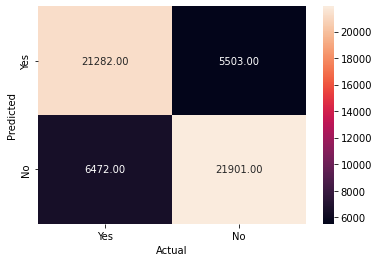

Total Accuracy :  0.78
Logistic F1 Score:  0.783
Logistic Precision:  0.795
Logistic Recall:  0.767


In [139]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
lrf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, y_pred), 3)
lr_recall = round(recall_score(y_test, y_pred), 3)

acc_logreg = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_logreg )
print("Logistic F1 Score: ", lrf1)
print("Logistic Precision: ", lr_precision)
print("Logistic Recall: ", lr_recall)

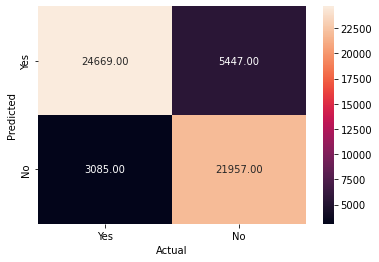

Total Accuracy :  0.845
KNN F1 Score:  0.845
KNN Precision:  0.819
KNN Recall:  0.889


In [140]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

knnf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)

# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_knn )
print("KNN F1 Score: ", knnf1)
print("KNN Precision: ", knn_precision)
print("KNN Recall: ", knn_recall)

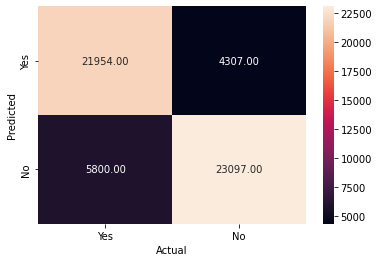

Total Accuracy :  0.82
SVM F1 Score:  0.817
SVM Precision:  0.836
SVM Recall:  0.791


In [141]:
from sklearn import svm

svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_svm )

svmf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
svm_precision = round(precision_score(y_test, y_pred), 3)
svm_recall = round(recall_score(y_test, y_pred), 3)

print("SVM F1 Score: ", svmf1)
print("SVM Precision: ", svm_precision)
print("SVM Recall: ", svm_recall)

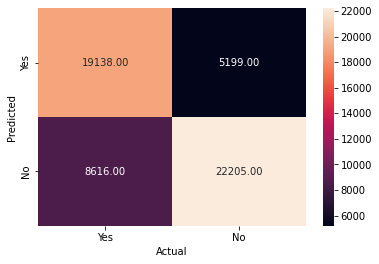

Total Accuracy :  0.75
GAUSIAN NB F1 Score:  0.749
GAUSIAN NB Precision:  0.786
GAUSIAN NB Recall:  0.69


In [142]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_nb )

gnbf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
gnb_precision = round(precision_score(y_test, y_pred), 3)
gnb_recall = round(recall_score(y_test, y_pred), 3)

print("GAUSIAN NB F1 Score: ", gnbf1)
print("GAUSIAN NB Precision: ", gnb_precision)
print("GAUSIAN NB Recall: ", gnb_recall)

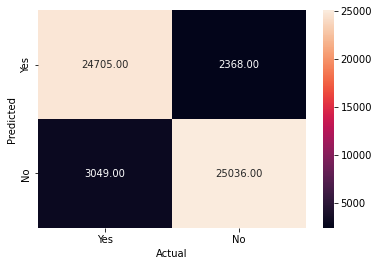

Total Accuracy :  0.902
RANDOM FOREST F1 Score:  0.902
RANDOM FOREST Precision:  0.913
RANDOM FOREST Recall:  0.89


In [143]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_rf )

rff1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)

print("RANDOM FOREST F1 Score: ", rff1)
print("RANDOM FOREST Precision: ", rf_precision)
print("RANDOM FOREST Recall: ", rf_recall)

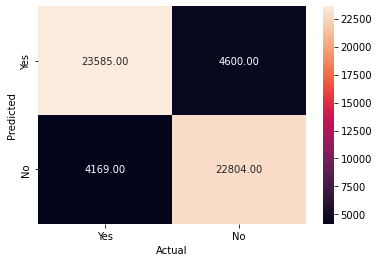

Total Accuracy :  0.84
DECISION TREE F1 Score:  0.841
DECISION TREE Precision:  0.837
DECISION TREE Recall:  0.85


In [144]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

# Model prediction on train data
y_pred = clf.predict(X_test)

# Prediction on test set
#y_pred = clf.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_dt = round(metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_dt)

dtf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dt_precision = round(precision_score(y_test, y_pred), 3)
dt_recall = round(recall_score(y_test, y_pred), 3)

print("DECISION TREE F1 Score: ", dtf1)
print("DECISION TREE Precision: ", dt_precision)
print("DECISION TREE Recall: ", dt_recall)

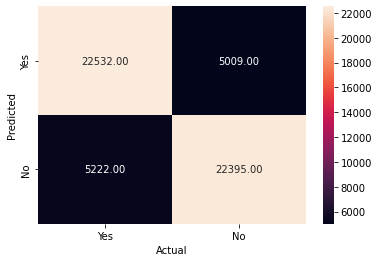

Total Accuracy :  0.815
XGBOOST F1 Score:  0.8145164460364375
XGBOOST Precision:  0.818
XGBOOST Recall:  0.812


In [145]:
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# Train the model using the training sets
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Confusion matrix 
draw_cm(y_test, y_pred)

# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_xgb )

xgf1 = f1_score(y_test, y_pred, average='weighted')
xg_precision = round(precision_score(y_test, y_pred), 3)
xg_recall = round(recall_score(y_test, y_pred), 3)

print("XGBOOST F1 Score: ", xgf1)
print("XGBOOST Precision: ", xg_precision)
print("XGBOOST Recall: ", xg_recall)

# AFTER PERFORMING FEATURE EXTRACTION ON OVERSAMPLED DATA (16 FEATURES), FINAL RESULT OF ALL MODELS

In [146]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb], 
    'F1Score': [lrf1, gnbf1, dtf1, rff1, svmf1, knnf1, xgf1], 
    'Precision': [lr_precision, gnb_precision, dt_precision, rf_precision, svm_precision, knn_precision, xg_precision], 
    'Recall': [lr_recall, gnb_recall, dt_recall, rf_recall, svm_recall, knn_recall, xg_recall]})
models.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
3,Random Forest,0.902,0.902000,0.913,0.890
5,K - Nearest Neighbors,0.845,0.845000,0.819,0.889
2,Decision Tree,0.840,0.841000,0.837,0.850
4,Support Vector Machines,0.820,0.817000,0.836,0.791
6,XGBoost,0.815,0.814516,0.818,0.812
0,Logistic Regression,0.780,0.783000,0.795,0.767
1,Naive Bayes,0.750,0.749000,0.786,0.690
